# Michael J Moore: Exploratory Data Analysis Project
**Author:** Michael J Moore  
**Purpose:** Perform exploratory data analysis (EDA) on the Iris dataset using Pandas, Seaborn, and Matplotlib.  
**Date:** September 2025  

This notebook follows a structured EDA workflow:
1. Imports  
2. Load Data  
3. Initial Data Inspection  
4. Initial Descriptive Statistics  
5. Initial Data Distribution  
6. Data Transformation and Feature Engineering  
7. Initial Visualizations  
8. Initial Insights  
9. Annotating the Notebook for Storytelling  

## 1. Imports

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot 

print("Starting out with Jupyter.")

Starting out with Jupyter.


 ## 2. Load Data
 We will use the **Iris dataset**, a well-known dataset in machine learning and statistics.  
It is available directly in the Seaborn library, which makes it easy to load into a Pandas DataFrame.

In [50]:

# Load the Iris dataset into pandas DataFrame
iris_df: pd.DataFrame = sns.load_dataset('iris')

# List column names
iris_df.columns

# Inspect first few rows of the DataFrame
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3. Initial Data Inspection
In this step, we begin to understand the structure of the dataset:
- Preview the first few rows  
- Check the shape (rows and columns)  
- Inspect data types  
- Review overall information about the dataset  

In [51]:
# Specify the number of rows to display
iris_df.head(10)

# Inspect the shape of the DataFrame with shape attribute
# The shape is a tuple with count of rows and columns in the DataFrame
iris_df.shape

# Inspect the data types of the columns with dtypes attribute
# The data types are returned as a pandas Series
iris_df.dtypes

# Inspect the data types of the columns with info() method
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 4. Initial Descriptive Statistics
We generate summary statistics for numerical columns using the `describe()` method.  
This provides mean, standard deviation, min, max, and quartiles.

In [52]:
# Inspect summary statistics for numerical columns
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 5. Initial Data Distribution for Numerical Columns
We now explore the distributions of numerical and categorical columns.
- **Histograms** show numerical distributions  
- **Value counts** show categorical distributions  
- **Count plots** visualize categorical columns 

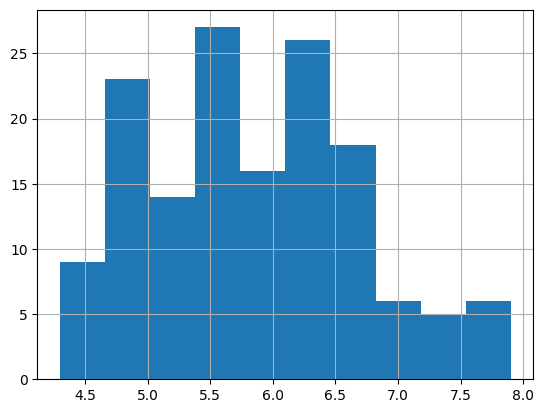

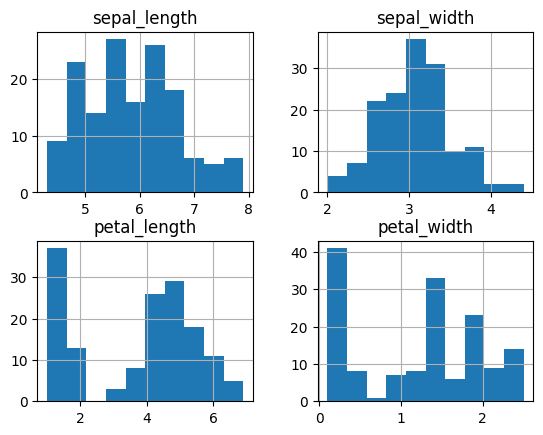

In [53]:
# Inspect histogram by one numerical column
iris_df['sepal_length'].hist()

# Inspect histograms for ALL numerical columns
iris_df.hist()

# Show all plots
matplotlib.pyplot.show()

- Numerical features show different distribution patterns: some are roughly bell-shaped, while others are skewed or clustered.  
- Certain features appear to vary within a narrow range, while others cover a much wider spread.  
- Some histograms suggest the presence of natural groupings or clusters in the data.  
- Features with clearer separation or distinct peaks may be more useful for classification or predictive modeling.  
- Overall, the distribution plots highlight which variables are more consistent and which display greater variability across observations.  

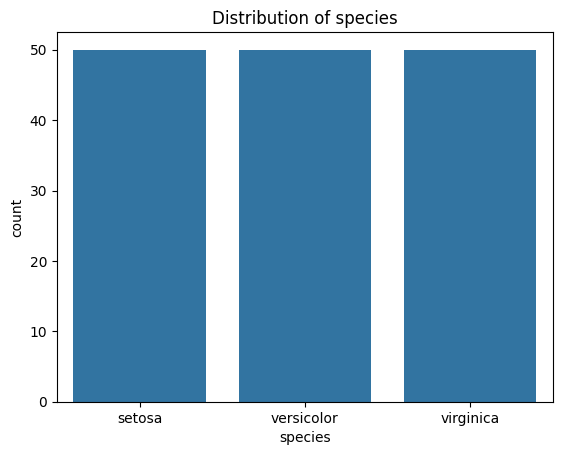

In [54]:
# Inspect value counts by categorical column
# Column name must be EXACT.
# The value_counts() method is only available for Series objects.
# The value_counts() method returns a pandas Series with the counts of unique values in the column.
iris_df['species'].value_counts()

# Inspect value counts for ALL categorical columns
for col in iris_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=iris_df)
    matplotlib.pyplot.title(f'Distribution of {col}')
    matplotlib.pyplot.show()

# Show all plots
matplotlib.pyplot.show()

- The categorical variable(s) appear to be **evenly balanced** across categories, with each group having a similar number of observations.  
- A balanced distribution like this is helpful because it reduces the risk of bias when building models.  
- If categories were highly imbalanced, it could signal the need for resampling or weighting techniques in future analysis.  
- Visualizing categorical variables provides a quick check for class balance and ensures no category is missing or underrepresented.  

## 6. Initial Data Transformation and Feature Engineering
Data rarely comes in the exact form we need. Here we demonstrate:
- Renaming columns for clarity  
- Creating a new feature (`Sepal Area`)  

In [55]:
# Feature Engineering
# Renaming a column
iris_df.rename(columns={'sepal_length': 'Sepal Length'}, inplace=True)

# Adding a new column
iris_df['Sepal Area'] = iris_df['Sepal Length'] * iris_df['sepal_width']


## 7. Initial Visualizations
Visualizations help us uncover relationships:
- **Pairplot**: scatter plots across all numerical columns, color-coded by species  
- **Scatter plot**: compare Sepal Length and Sepal Area  

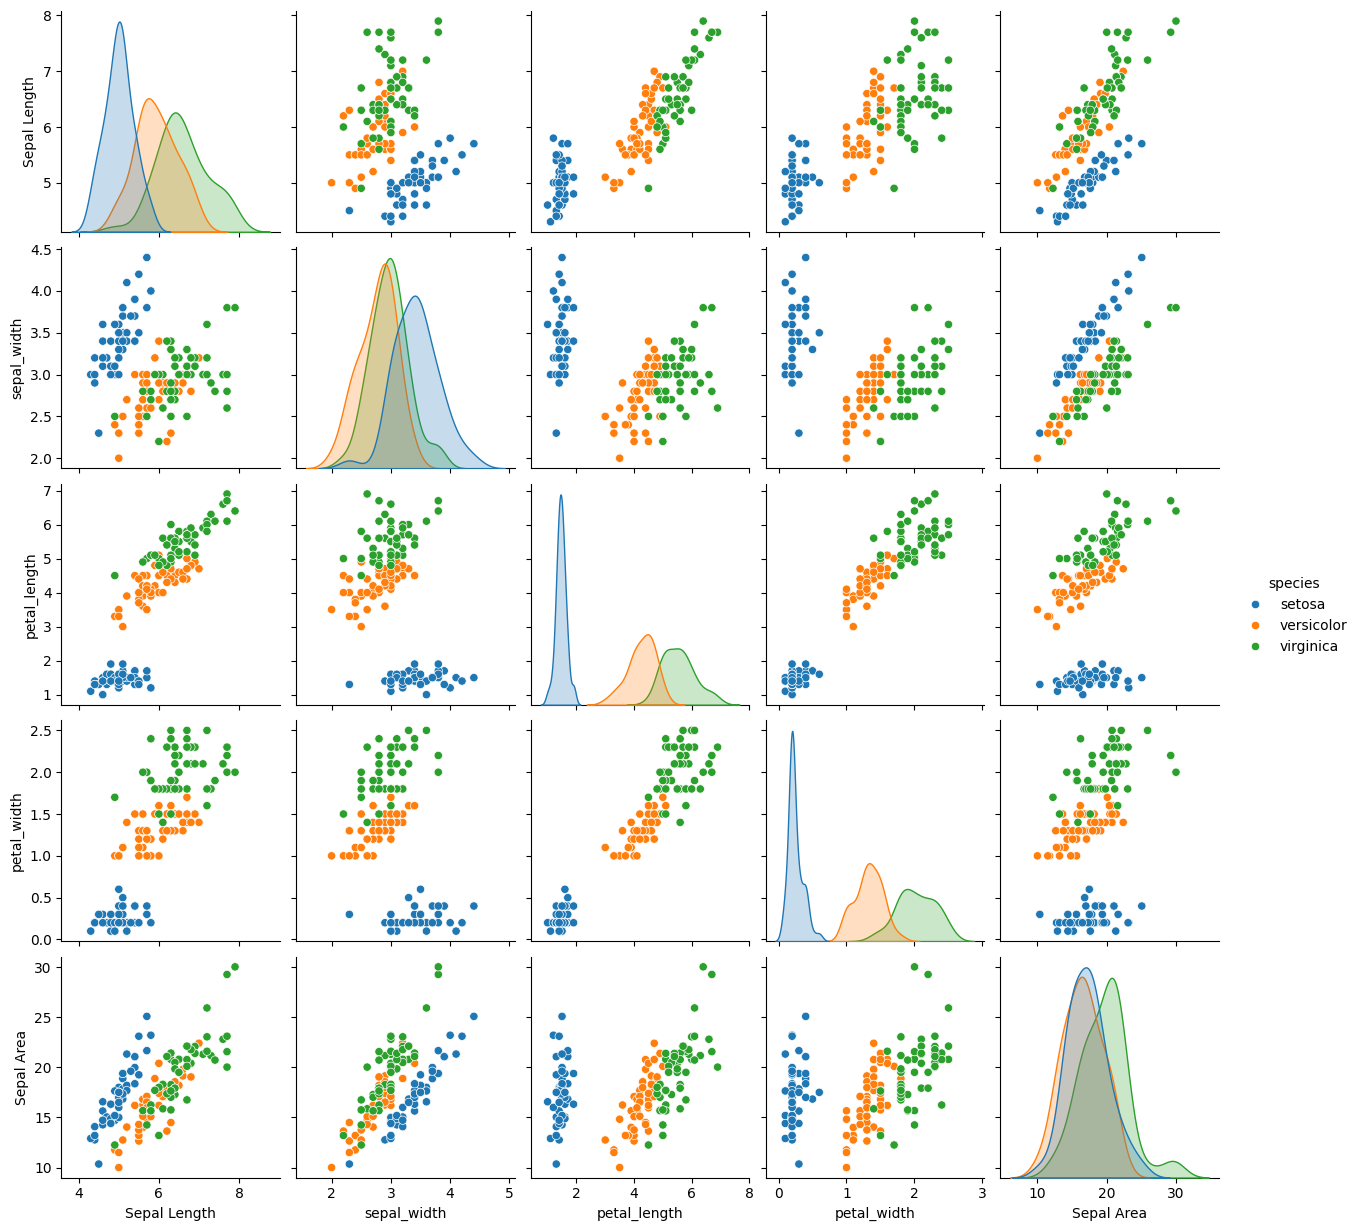

In [56]:
# Feature Engineering
# Renaming a column
iris_df.rename(columns={'sepal_length': 'Sepal Length'}, inplace=True)

# Adding a new column
iris_df['Sepal Area'] = iris_df['Sepal Length'] * iris_df['sepal_width']

# Create a pairplot of the Iris dataset
# A pairplot is a grid of scatter plots for each pair of numerical columns in the dataset
# The hue parameter is used to color the data points 
# by species (a categorical column)
sns.pairplot(iris_df, hue='species')

# Show all plots
matplotlib.pyplot.show()


- The pairwise plots highlight clear patterns and relationships among the numerical variables.  
- Some features show **linear relationships**, while others display more spread or overlap.  
- Certain variables appear to provide stronger separation between categories, while others overlap more heavily.  
- These patterns suggest which features may be more informative for tasks like clustering, classification, or predictive modeling.  
- Visualizing features against each other helps reveal **correlations, clusters, and trends** that might not be obvious from summary statistics alone.  

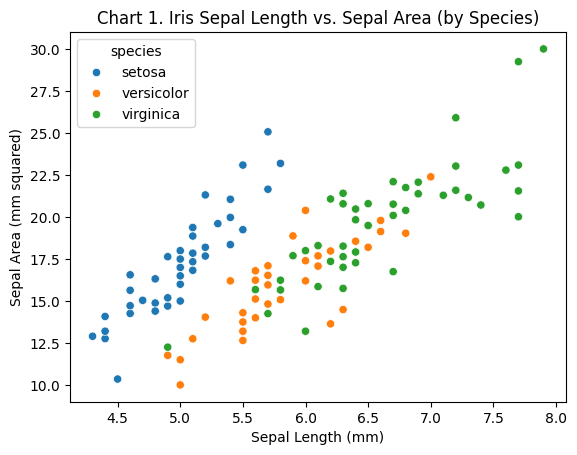

In [59]:
# A scatter plot is a plot of two numerical variables.
scatter_plt = sns.scatterplot(
    data=iris_df, x="Sepal Length", y="Sepal Area", hue="species"
)

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Sepal Length (mm)")
scatter_plt.set_ylabel("Sepal Area (mm squared)")   

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 1. Iris Sepal Length vs. Sepal Area (by Species)")

matplotlib.pyplot.show()

- The scatter plot shows a **positive relationship** between the two numerical variables, meaning as one increases, the other tends to increase as well.  
- The categories are color-coded, and while there is some overlap, distinct clusters can still be observed.  
- This kind of visualization helps to identify trends, groupings, and possible outliers in the data.  
- Feature engineering (such as creating `Sepal Area`) can reveal new relationships that may not be obvious from the original variables alone.  
- Scatter plots are especially useful for exploring how two variables interact and for spotting patterns that may inform predictive modeling.  


## 8. Initial Insights

Based on the analysis so far:
- Petal measurements (length and width) clearly separate the three species  
- Sepal measurements overlap more, making them less useful for classification  
- The engineered feature `Sepal Area` may improve separability for some species  
- Setosa is the easiest species to distinguish; Versicolor and Virginica overlap more  

## 9. Annotate Your Notebook for Storytelling and Presentation

This notebook demonstrates a complete EDA workflow:
- Organized with numbered sections  
- Uses descriptive Markdown to explain each step  
- Provides both statistical and visual exploration  
- Ends with insights that can be expanded in further analysis  

By combining code, visuals, and narrative, this notebook tells a clear data story.